In [141]:
import pandas as pd 
import numpy as np

In [142]:
df = pd.read_csv("./Datasets/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1002 non-null   object
 1   race/ethnicity               1002 non-null   object
 2   parental level of education  1002 non-null   object
 3   lunch                        1002 non-null   object
 4   test preparation course      1002 non-null   object
 5   math score                   1002 non-null   int64 
 6   reading score                1002 non-null   int64 
 7   writing score                1002 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.8+ KB


In [144]:
df.describe()

,math score,reading score,writing score
count,1002.000000,1002.000000,1002.000000
mean,66.594810,69.549900,68.117764
std,16.403732,15.955733,15.462051
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,80.000000,79.000000
max,169.000000,174.000000,158.000000


In [145]:
missing_values = df.isnull().sum()
print(missing_values)

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [146]:
df['math score'].fillna(df['math score'].mean(),inplace=True)
df['reading score'].fillna(df['reading score'].mean(),inplace=True)
df['writing score'].fillna(df['writing score'].mean(),inplace=True)

/tmp/ipykernel_6501/3534222321.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['math score'].fillna(df['math score'].mean(),inplace=True)
/tmp/ipykernel_6501/3534222321.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [147]:
outlier_indices = np.where((df['math score'] > 100) | (df['math score'] < 0))
print(outlier_indices)

(array([ 8,  9, 19, 21, 23, 25]),)


In [148]:
outlier_rows = df.iloc[outlier_indices[0]]
outlier_rows

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
8,male,group D,high school,free/reduced,completed,164,64,67
9,female,group B,high school,free/reduced,none,101,60,50
19,female,group B,some high school,free/reduced,none,118,32,28
21,female,group C,associate's degree,free/reduced,none,154,58,61
23,female,group B,some college,free/reduced,completed,165,75,70
25,female,group C,some high school,standard,none,169,173,73


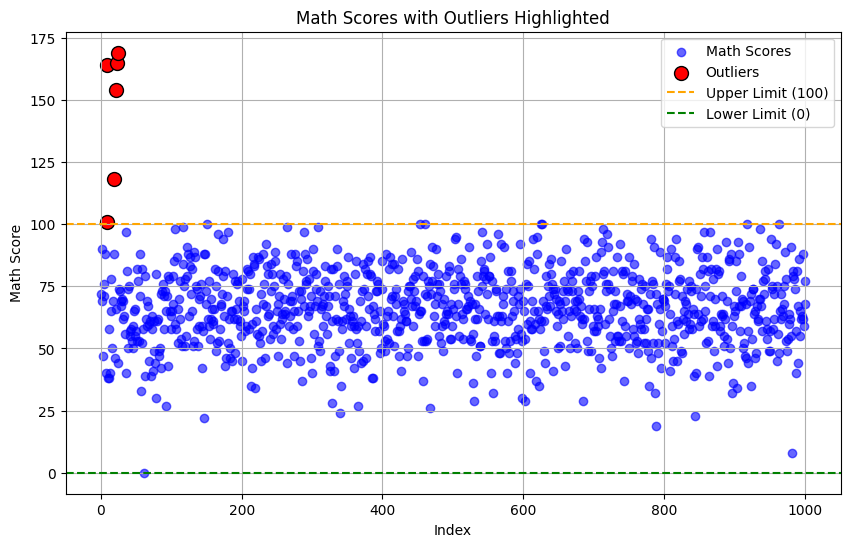

In [149]:
import matplotlib.pyplot as plt

# Extract outliers
outlier_indices = np.where((df['math score'] > 100) | (df['math score'] < 0))[0]  # Get the indices as a list
outliers = df.iloc[outlier_indices]  # Get the rows with outliers

# Plot all math scores
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['math score'], label='Math Scores', color='blue', alpha=0.6)

# Highlight outliers
plt.scatter(outliers.index, outliers['math score'], color='red', label='Outliers', s=100, edgecolors='black')

# Add labels and legend
plt.axhline(100, color='orange', linestyle='--', label='Upper Limit (100)')
plt.axhline(0, color='green', linestyle='--', label='Lower Limit (0)')
plt.xlabel('Index')
plt.ylabel('Math Score')
plt.title('Math Scores with Outliers Highlighted')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [150]:
outlier_indices = np.where((df['reading score'] > 100) | (df['reading score'] < 0))
print(outlier_indices)
outlier_rows = df.iloc[outlier_indices[0]]
outlier_rows

(array([25, 29, 31, 32]),)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
25,female,group C,some high school,standard,none,169,173,73
29,female,group C,bachelor's degree,standard,none,67,169,75
31,female,group D,master's degree,standard,none,62,170,75
32,female,group D,some college,standard,none,69,174,74


In [151]:
outlier_indices = np.where((df['writing score'] > 100) | (df['writing score'] < 0))
print(outlier_indices)
outlier_rows = df.iloc[outlier_indices[0]]
outlier_rows

(array([16]),)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
16,female,group A,master's degree,standard,none,50,53,158


InterQuantile Range

In [152]:
def detect_outliers_iqr(data,column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3-Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(lower_bound," ",upper_bound)
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

outliers = detect_outliers_iqr(df,'writing score')
outliers

24.0   112.0


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
16,female,group A,master's degree,standard,none,50,53,158
61,female,group C,some high school,free/reduced,none,0,17,10
78,male,group E,some high school,standard,none,30,26,22
329,male,group A,some college,free/reduced,none,28,23,19
598,male,group B,high school,free/reduced,none,30,24,15
982,female,group B,high school,free/reduced,none,8,24,23
